In [17]:
import pandas as pd

In [18]:
# Ler documento Excel
df = pd.read_excel('city_happiness.xlsx', sheet_name='2024')

df.head()


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [19]:
# Análise Descritiva das Variáveis

# Filtrando apenas as colunas numéricas para a análise
colunas_numericas = df.select_dtypes(include=['number']).columns

# Tradução das estatísticas para português
traducao_estatisticas = {
    'count': 'Contagem',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    '25%': '1º Quartil',
    '50%': 'Mediana',
    '75%': '3º Quartil',
    'max': 'Máximo'
}

# Função para fazer a análise nas colunas numéricas
for coluna in colunas_numericas:
    # Principais medidas estatísticas
    analise = df[coluna].describe()
    if coluna == 'Year':
        continue

    # Assimetria e curtose
    assimetria = df[coluna].skew()
    curtose = df[coluna].kurt()

    # Adicionando ao resultado
    analise['Assimetria'] = assimetria
    analise['Curtose'] = curtose

    # Traduzindo
    analise.index = [traducao_estatisticas.get(item, item) for item in analise.index]

    # Exibindo a tabela para cada variável
    print(f"\nAnálise da variável: {coluna}")
    print(analise.T)  # Transpor
    print("-" * 50)  # Separador as tabelas




Análise da variável: Decibel_Level
Contagem         233.000000
Média             59.163090
Desvio Padrão      9.135428
Mínimo            50.000000
1º Quartil        55.000000
Mediana           55.000000
3º Quartil        60.000000
Máximo            90.000000
Assimetria         1.430621
Curtose            1.439065
Name: Decibel_Level, dtype: float64
--------------------------------------------------

Análise da variável: Green_Space_Area
Contagem         233.000000
Média            332.639485
Desvio Padrão    277.400197
Mínimo             5.000000
1º Quartil        55.000000
Mediana          285.000000
3º Quartil       575.000000
Máximo           865.000000
Assimetria         0.393480
Curtose           -1.263952
Name: Green_Space_Area, dtype: float64
--------------------------------------------------

Análise da variável: Air_Quality_Index
Contagem         233.000000
Média             52.145923
Desvio Padrão     51.948127
Mínimo             5.000000
1º Quartil        25.000000
Mediana 

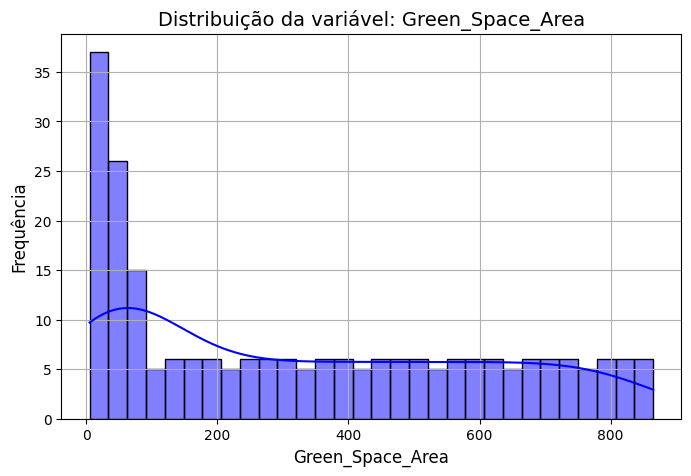

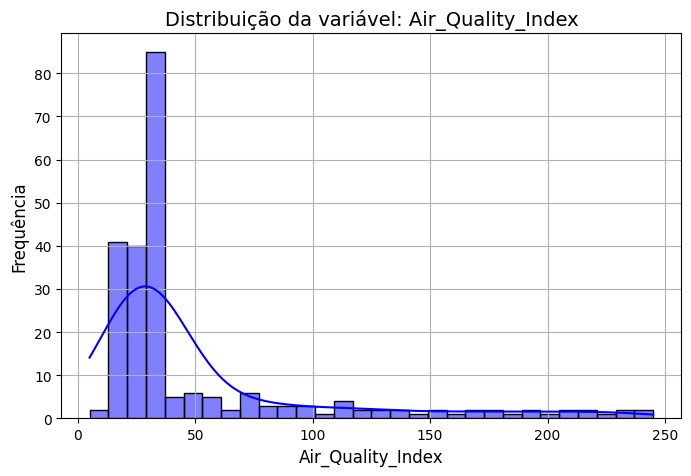

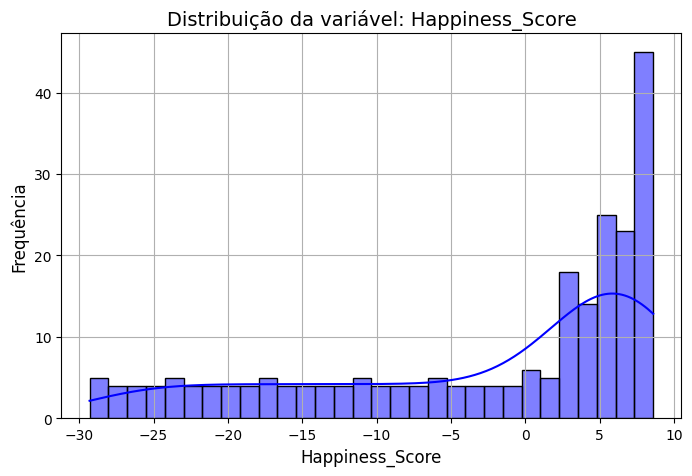

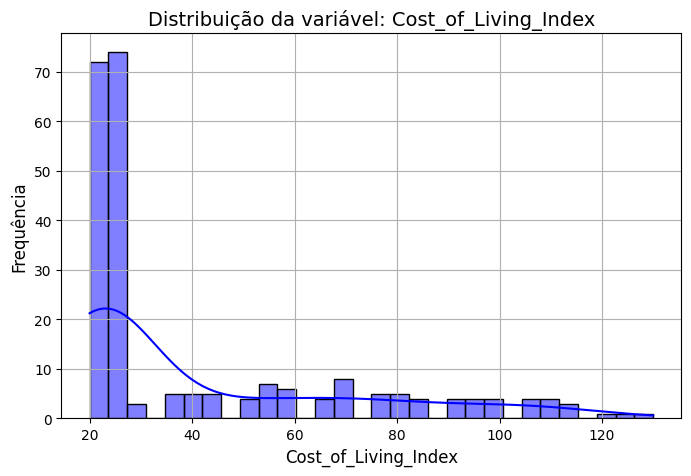

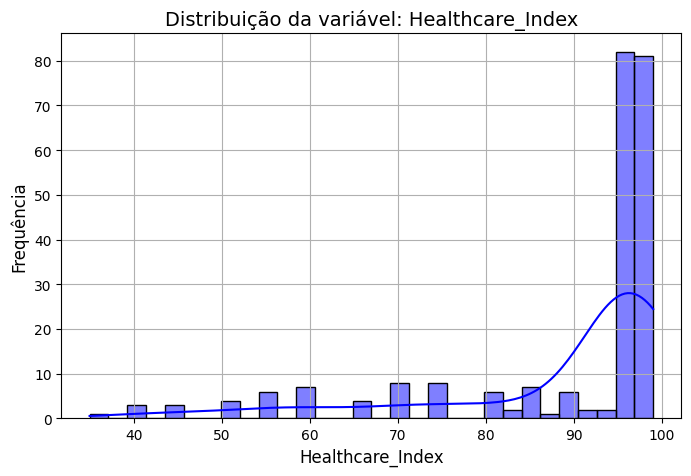

In [20]:
# Construção dos Histogramas

import matplotlib.pyplot as plt
import seaborn as sns

variaveis = ['Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score',
             'Cost_of_Living_Index', 'Healthcare_Index']

for var in variaveis:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribuição da variável: {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(True)
    plt.show()


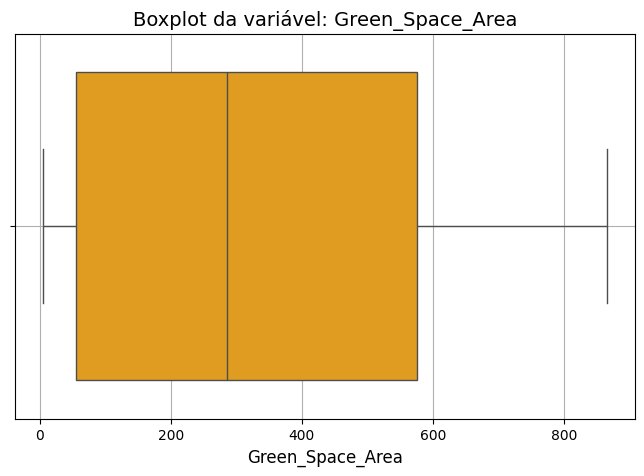

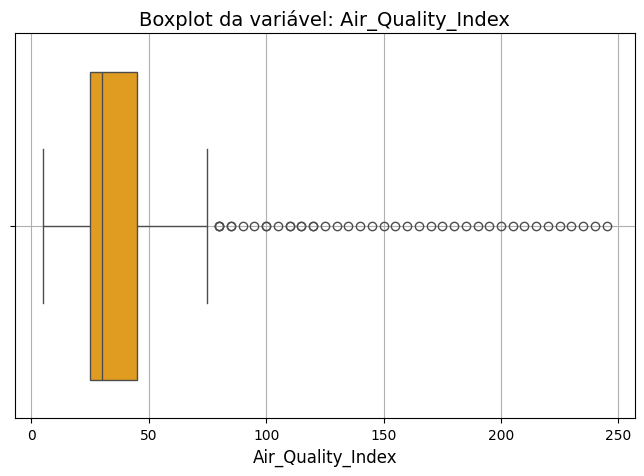

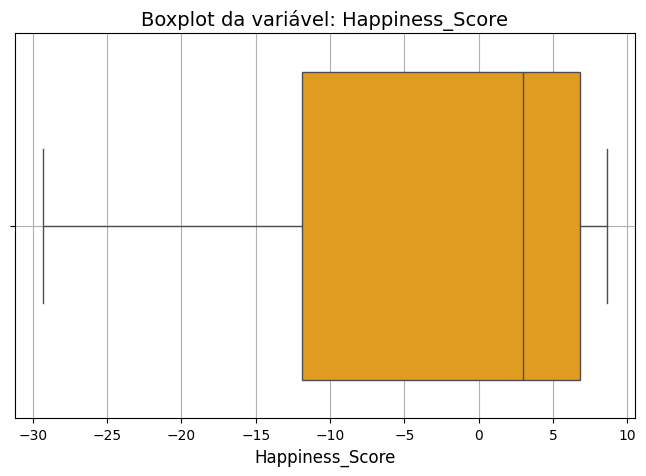

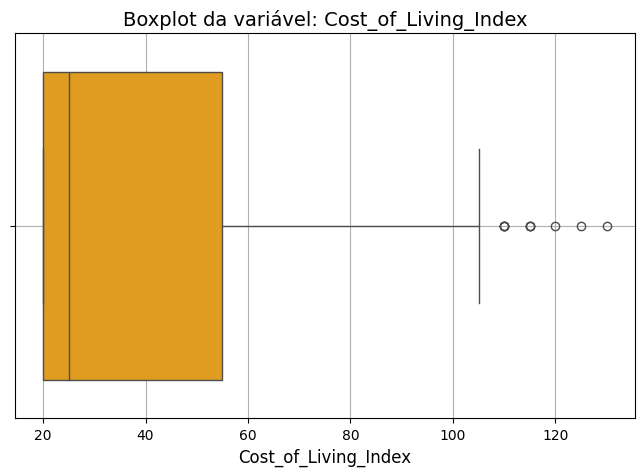

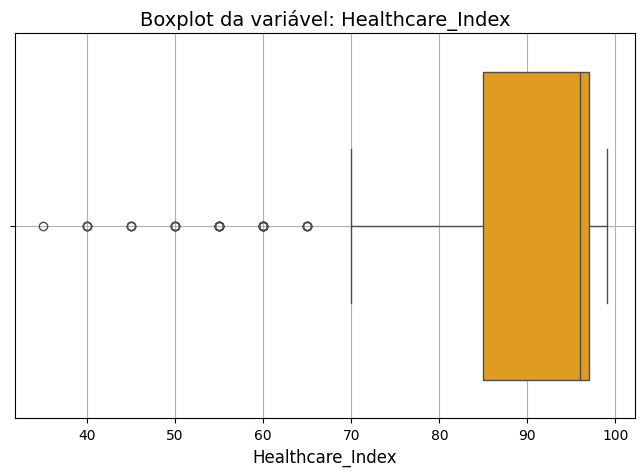

In [21]:
#Identificação dos Outliers por meio de boxplots

for var in variaveis:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var], color='orange')
    plt.title(f'Boxplot da variável: {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.grid(True)
    plt.show()


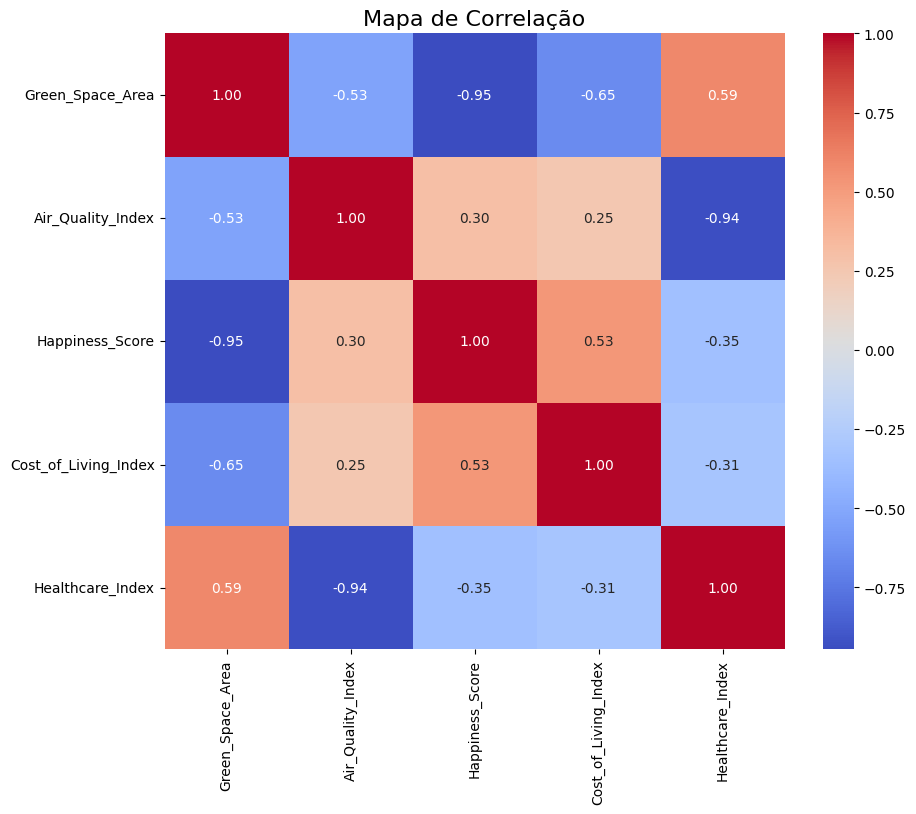

In [22]:
# Mapa de Correlação

correlacao = df[variaveis].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação', fontsize=16)
plt.show()


In [23]:
# Identificação dos outliers

# Criar um dicionário para armazenar os outliers de cada variável
outliers = {}

for coluna in ['Air_Quality_Index', 'Cost_of_Living_Index', 'Healthcare_Index']:
    # Calculando os quartis e IQR
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Calculando os limites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]

    print(f"\nOutliers em {coluna}:")
    print(outliers[coluna])

# Resumo geral dos outliers
print("\nResumo dos outliers detectados:")
for coluna, valores in outliers.items():
    print(f"{coluna}: {len(valores)} outliers detectados.")



Outliers em Air_Quality_Index:
8      80
10     85
13     90
15    110
18    115
19     80
21    120
22    100
38     80
39     85
40     95
41    100
42    105
43    110
44    115
45    120
46    125
47    130
48    135
49    140
50    145
51    150
52    155
53    160
54    165
55    170
56    175
57    180
58    185
59    190
60    195
61    200
62    205
63    210
64    215
65    220
66    225
67    230
68    235
69    240
70    245
Name: Air_Quality_Index, dtype: int64

Outliers em Cost_of_Living_Index:
3     110
6     120
9     115
20    125
21    110
22    130
25    115
31    110
33    115
71    110
Name: Cost_of_Living_Index, dtype: int64

Outliers em Healthcare_Index:
8     60
13    60
15    55
18    65
41    60
43    65
44    55
45    60
46    65
48    60
49    65
51    55
52    50
53    60
57    55
58    50
59    45
60    40
61    60
62    55
63    50
64    45
65    40
66    35
67    40
68    55
69    50
70    45
Name: Healthcare_Index, dtype: int64

Resumo dos outliers det

In [24]:
# Analisar contextualmente as cidades com outliers

# Filtrando as cidades com outliers para Air_Quality_Index
outliers_air_quality = df[df['Air_Quality_Index'].isin([80, 85, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 245])]
print("Cidades com outliers em Air_Quality_Index:")
print(outliers_air_quality[['City', 'Air_Quality_Index']])

# Filtrando as cidades com outliers para Cost_of_Living_Index
outliers_cost_of_living = df[df['Cost_of_Living_Index'].isin([110, 120, 125, 115, 130])]
print("\nCidades com outliers em Cost_of_Living_Index:")
print(outliers_cost_of_living[['City', 'Cost_of_Living_Index']])

# Filtrando as cidades com outliers para Healthcare_Index
outliers_healthcare = df[df['Healthcare_Index'].isin([60, 55, 65, 50, 45, 40, 35])]
print("\nCidades com outliers em Healthcare_Index:")
print(outliers_healthcare[['City', 'Healthcare_Index']])


Cidades com outliers em Air_Quality_Index:
                City  Air_Quality_Index
8             Mumbai                 80
10          Istanbul                 85
13       Mexico City                 90
15           Bangkok                110
19            Moscow                 80
21             Dubai                120
22         Hong Kong                100
38             Sofia                 80
39          Belgrade                 85
41              Lima                100
43            Bogota                110
45             Quito                120
47          Kingston                130
49     Santo Domingo                140
51            Manila                150
53      Kuala Lumpur                160
55          Shanghai                170
57         New Delhi                180
59           Karachi                190
61           Colombo                200
63         Kathmandu                210
65             Hanoi                220
67         Vientiane                2

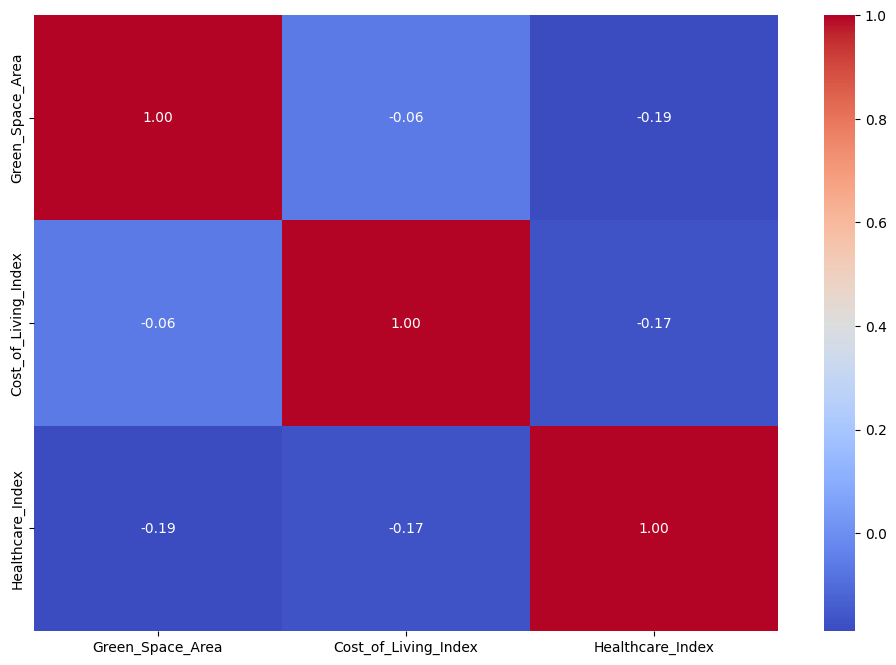

In [46]:
# Selecionando apenas colunas numéricas
X_train_num = X_train.select_dtypes(include=['number'])

# Calculando a correlação
corr = X_train_num.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


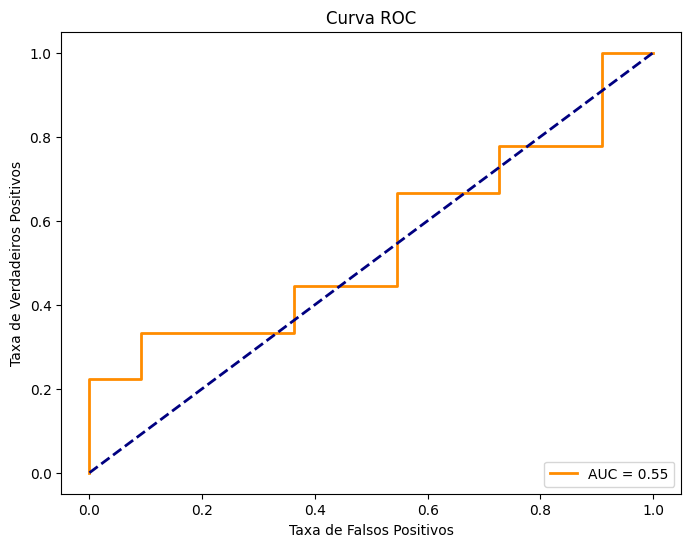

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.60      0.33      0.43         9

    accuracy                           0.60        20
   macro avg       0.60      0.58      0.56        20
weighted avg       0.60      0.60      0.57        20


Coeficientes da Regressão Logística:
Green_Space_Area: 0.1550
Cost_of_Living_Index: 0.0360
Healthcare_Index: 0.1376
City_CityA: -0.0726
City_CityB: 0.0469
City_CityC: 0.0263


In [47]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Simulação de um DataFrame (substitua isso pelos seus dados reais)
np.random.seed(42)
data = {
    'Green_Space_Area': np.random.uniform(50, 800, 100),
    'Cost_of_Living_Index': np.random.uniform(20, 120, 100),
    'Healthcare_Index': np.random.uniform(50, 100, 100),
     'City': np.random.choice(['CityA', 'CityB', 'CityC'], 100),
    'Happiness_Score': np.random.randint(0, 2, 100)  # 0 ou 1 (binário)
}
df = pd.DataFrame(data)

# Definir X (variáveis explicativas) e y (alvo)
X = df[['Green_Space_Area', 'Cost_of_Living_Index', 'Healthcare_Index', 'City']]
y = df['Happiness_Score']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Definir pré-processadores para variáveis numéricas e categóricas
numeric_features = ['Green_Space_Area', 'Cost_of_Living_Index', 'Healthcare_Index']
categorical_features = ['City']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criar o pipeline completo com pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Treinar o pipeline com os dados de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Avaliação: Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Avaliação: Relatório de Classificação
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Extração e exibição dos coeficientes
logreg_model = pipeline.named_steps['logreg']

# Obter os nomes das features após o pré-processamento
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(numeric_features).tolist()
feature_names += pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Exibir coeficientes
coefficients = logreg_model.coef_[0]
print("\nCoeficientes da Regressão Logística:")
for name, coef in zip(feature_names, coefficients):
    print(f'{name}: {coef:.4f}')


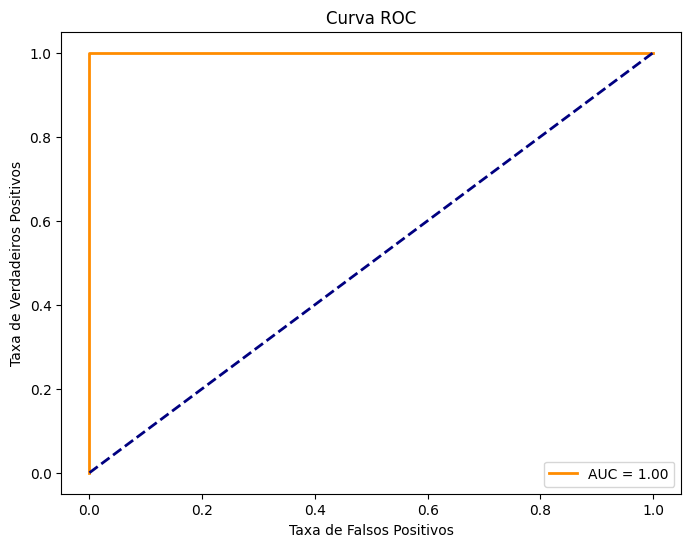

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Identificando as colunas categóricas e numéricas
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# Definindo o pré-processamento para colunas numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Escalonando as variáveis numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-Hot Encoding para as variáveis categóricas, ignorando categorias desconhecidas
    ])

# Criando o pipeline com o pré-processamento e o modelo LogisticRegression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Pré-processamento dos dados
    ('logreg', LogisticRegression())  # Modelo Logistic Regression para gerar probabilidades
])

# Treinando o modelo com os dados de treinamento
lasso_pipeline.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = lasso_pipeline.predict(X_test)

# Gerando a Curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, lasso_pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
# Precisão
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1-score
f1 = f1_score(y_test, y_pred)
# AUC
auc_score = roc_auc_score(y_test, lasso_pipeline.predict_proba(X_test)[:, 1])

# Imprimir as métricas
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'AUC: {auc_score:.2f}')


Acurácia: 0.96
Precisão: 0.93
Recall: 1.00
F1-score: 0.96
AUC: 1.00
